In [1]:
import pandas as pd
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

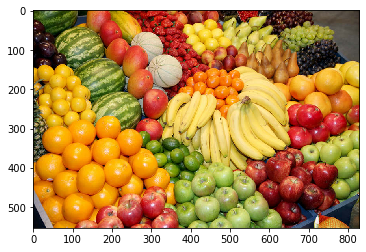

In [2]:
# Load image 
lion = plt.imread(r"Desktop\fruits.jpg") 
plt.imshow(lion, cmap = plt.get_cmap('gray'))
plt.show()


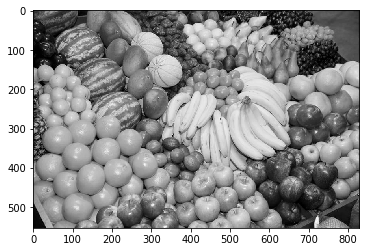

In [3]:
# Convert color image to grayscale to help extraction of edges and plot it
lion_gray = np.dot(lion[...,:3], [0.299, 0.587, 0.114])
#lion_gray = lion_gray.astype('int32')
plt.imshow(lion_gray, cmap = plt.get_cmap('gray'))
plt.show()


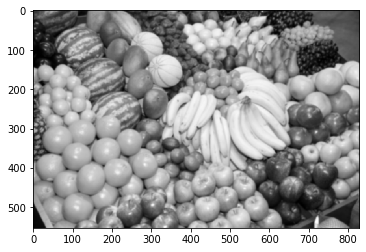

In [4]:
# Blur the grayscale image so that only important edges are extracted and the noisy ones ignored
lion_gray_blurred = ndimage.gaussian_filter(lion_gray, sigma=1.4) # Note that the value of sigma is image specific so please tune it
plt.imshow(lion_gray_blurred, cmap = plt.get_cmap('gray'))
plt.show()

## Simple Thresholding

In [ ]:
_, thresh1 = cv.threshold(lion, 127, 100, cv.THRESH_BINARY) #values less than threshold becomes 0 & values greater than threshold will assigned max_value, arg1=src, arg2=thresh_value, arg3=max_value(set in output image), arg4= type of thresholding.
_, thresh2 = cv.threshold(lion, 127, 255, cv.THRESH_BINARY_INV) #inverse of above
_, thresh3 = cv.threshold(lion, 127, 255, cv.THRESH_TOZERO) #vlaues less than threshold becomes 0 (others remain unchanged)
_, thresh4 = cv.threshold(lion, 127, 255, cv.THRESH_TOZERO_INV) #vlaues greater than threshold becomes 0 (others remain unchanged)
_, thresh5 = cv.threshold(lion, 127, 255, cv.THRESH_TRUNC) #all values greater than threshold will assigned same values as threshold

cv.imshow('img', lion)
cv.imshow('binary', thresh1)
cv.imshow('binary_inverse', thresh2)
cv.imshow('toZero', thresh3)
cv.imshow('toZero_inverse', thresh4)
cv.imshow('trunc', thresh5)
cv.waitKey(0)
plt.show()

## Adaptive/OTSU thresholding

In [ ]:
import cv2 

image1 = cv2.imread('Desktop\fruits.jpg')
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV) 
cv2.imshow('Binary Threshold Inverted', thresh2)

In [ ]:
import cv2          
import numpy as np 
image1 = cv2.imread('original.jpeg')
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('Otsu Threshold', thresh1)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()